In [3]:
import pandas as pd
import matplotlib.pyplot as plt    # import matplotlib
import numpy as np                 # import numpy
import time                        # import time
import ipywidgets as widgets       # interactive display
from scipy.stats import pearsonr   # import pearson correlation

fig_w, fig_h = (6, 4)
plt.rcParams.update({'figure.figsize': (fig_w, fig_h)})

In [31]:
def default_pars( **kwargs):
    pars = {}
    pars['sm']    = 0.005 #Source of non-specific local response
    pars['um']    = 0.002 #Decay rate for the non-specific local response
    
    ### simulation parameters ###
    pars['T'] = 3000. # Total duration of simulation [ms]
    pars['dt'] = .1  # Simulation time step [ms]

    ### external parameters if any ###
    for k in kwargs:
        pars[k] = kwargs[k]
    
    pars['range_t'] = np.arange(0, pars['T'], pars['dt']) # Vector of discretized time points [ms]
        
    return pars    

In [35]:
def run_sepsis_model(pars):
    # Set parameters
    sm, um = pars['sm'],pars['um']
    
    dt, range_t = pars['dt'], pars['range_t']
    Lt = range_t.size
    
    M = np.zeros(Lt) # non-specific local response levels
    M[0]= 0    
    for it in range(Lt-1):
        dM = (sm-um*M[it] )* dt

        #update
        M[it+1] = M[it] + dM
    return(M)

In [36]:
pars = default_pars()
M =run_sepsis_model(pars)

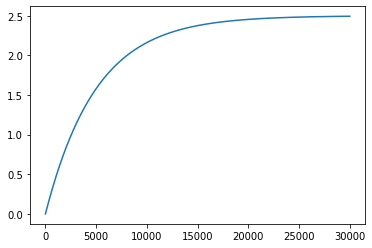

In [37]:
plt.plot(M)